<a href="https://colab.research.google.com/github/alanfmorato/MovieReview/blob/main/Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando as notas**

In [24]:
import pandas as pd
import seaborn as sns

In [7]:
notas = pd.read_csv("ratings.csv")

**Verificando as 5 primeiras linhas do código**

In [8]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Verificando o tamanho do meu dataset (Linhas x colunas)**

In [10]:
notas.shape

(80090, 4)

**Renomeando colunas**

In [11]:
notas.columns = "usuarioId", "filmeId", "nota", "momento"

In [12]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Verificando coluna**

In [13]:
notas['nota']

0        4.0
1        4.0
2        4.0
3        5.0
4        5.0
        ... 
80085    3.5
80086    4.0
80087    4.5
80088    4.0
80089    4.5
Name: nota, Length: 80090, dtype: float64

**Verificando valores dentro da coluna nota**

In [14]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

**Quantidade de valores por classe de notas**

In [16]:
notas['nota'].value_counts()

4.0    21732
3.0    15952
5.0    10754
3.5    10255
4.5     6905
2.0     6140
2.5     3863
1.0     2178
1.5     1260
0.5     1051
Name: nota, dtype: int64

**Média das notas**

In [22]:
print(notas['nota'].mean())
print(notas.nota.median())

3.5216631289798976
3.5


**Plotando um histograma com as notas**

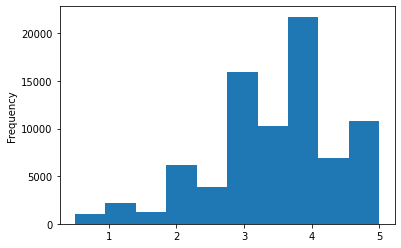

In [20]:
notas.nota.plot(kind='hist')

**Verificando a quantidade de dados por quartis, min e max**

In [23]:
notas.nota.describe()

count    80090.000000
mean         3.521663
std          1.037898
min          0.500000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: nota, dtype: float64

**Visualizando dados por boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


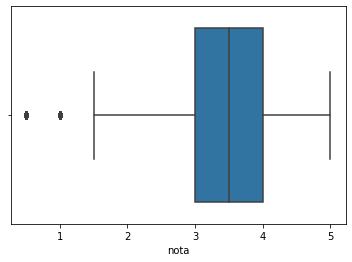

In [25]:
sns.boxplot(notas.nota)

# **Analisando os filmes**

In [32]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulos", "generos"]
filmes.head()

,filmeId,titulos,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Analisando as médias das notas do filme com ID 1**

In [35]:
notas.query("filmeId == 1").nota.mean()

3.954022988505747

**Agrupando os dados por filme ID**

In [41]:
medias_filmes = notas.groupby('filmeId').mean()['nota']
medias_filmes.head()

filmeId
1    3.954023
2    3.375000
3    3.340909
4    2.500000
5    3.151163
Name: nota, dtype: float64

**Histograma por medias dos filmes**

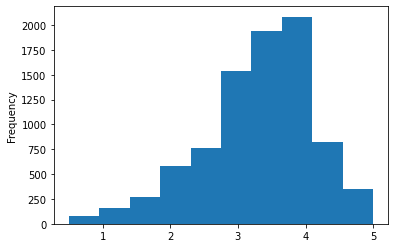

In [52]:
medias_filmes.plot(kind = "hist")

**Boxplot das medias**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


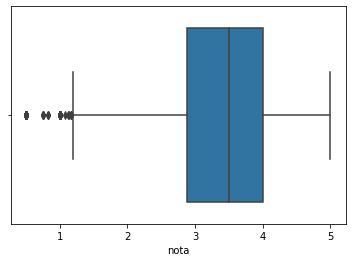

In [45]:
sns.boxplot(medias_filmes)

**Histograma plotado com seaborn**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


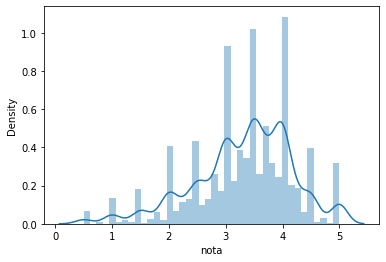

In [53]:
sns.distplot(medias_filmes, bins=40)


In [55]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**Verificando as linguagens que os filmes possuem**

In [56]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

**Contando a quantidade de filme com cada lingua**

In [66]:
contagem_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_lingua.columns = ['original_language', 'total']
contagem_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


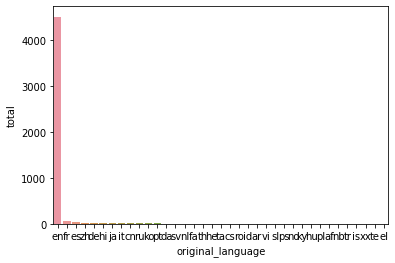

In [67]:
sns.barplot(x = "original_language", y = "total", data = contagem_lingua)

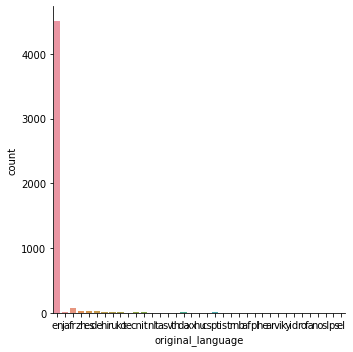

In [68]:
sns.catplot(x = "original_language", kind = 'count', data = tmdb)

In [71]:
import matplotlib.pyplot as plt

**Separando filmes em inglÊs e filmes em outra lingua**

In [78]:
total_por_lingua = tmdb["original_language"].value_counts()
total_en = total_por_lingua.loc['en']
total_geral = total_por_lingua.sum()
total_resto = total_geral - total_en
print(total_en, total_resto)

4505 298


**Criando um dicionário com os valores**

In [79]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_en, total_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

**Transformando os dados em dataframe**

In [80]:
dados = pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


**Plotando a diferença entre as linguas**

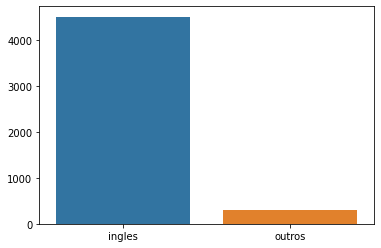

In [82]:
sns.barplot(x = 'lingua', y = 'total', data = dados)

**Mostrando a diferença de quantidade das linguas que não são inglês**

In [87]:
total_por_lingua_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

In [88]:
filme_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

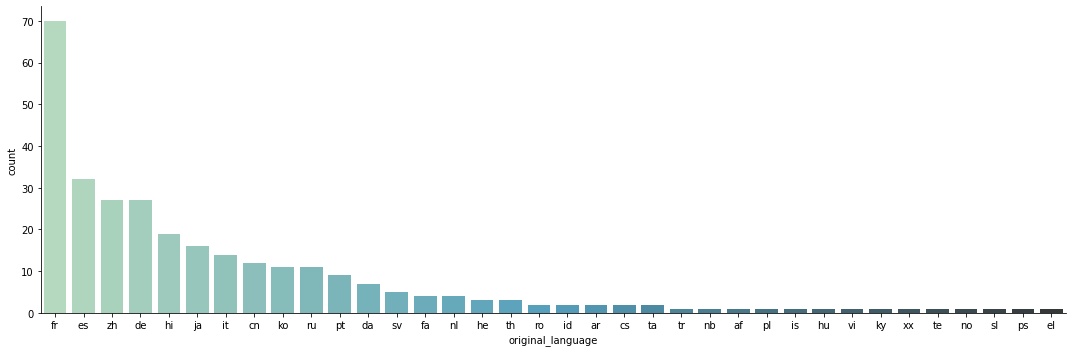

In [100]:
sns.catplot(x = 'original_language', kind = 'count', data = filme_sem_lingua_original_em_ingles, aspect = 3, order = total_por_lingua_outros_filmes.index, palette = 'GnBu_d')